In [11]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


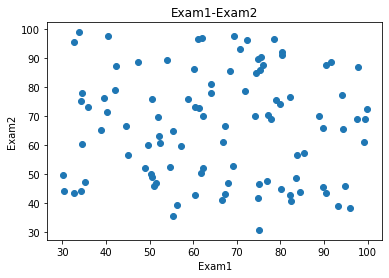

In [12]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:, "Exam1"], data.loc[:, "Exam2"])
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.show()

In [13]:
# add lable mask
mask = data.loc[:, 'Pass'] == 1
print(~mask)

0      True
1      True
2      True
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Pass, Length: 100, dtype: bool


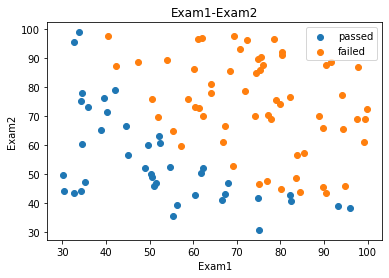

In [14]:
fig2 = plt.figure()
passed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, "Exam2"][~mask])  
failed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, "Exam2"][mask])
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2") 
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

In [15]:
# define X y
X = data.drop(['Pass'], axis=1)
y = data.loc[:, 'Pass']
x1 = data.loc[:, 'Exam1']
x2 = data.loc[:, 'Exam2']
x1.head()

0    34.623660
1    30.286711
2    35.847409
3    60.182599
4    79.032736
Name: Exam1, dtype: float64

In [16]:
print(X.shape, y.shape)

(100, 2) (100,)


In [17]:
# establish the model and train it
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X, y)

LogisticRegression()

In [18]:
# show the predicted result and its accuracy
y_predict = LR.predict(X)
print(y_predict) 

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [19]:
# exam1=70 exam2=65
y_test = LR.predict([[70,65]])
print('passed' if y_test==1 else 'failed')

passed


In [20]:
LR.intercept_

array([-25.05219314])

In [21]:
theta0 = LR.intercept_
theta1, theta2 = LR.coef_[0][0], LR.coef_[0][1]
print(theta0, theta1, theta2)

[-25.05219314] 0.20535491217790383 0.20058380395469044


In [22]:
X2_new = -(theta0 + theta1*x1)/theta2
print(X2_new)

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


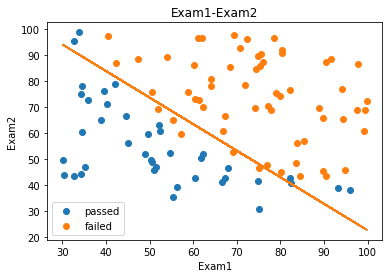

In [23]:
fig3 = plt.plot(x1, X2_new)
passed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, "Exam2"][~mask])  
failed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, "Exam2"][mask])
plt.plot(x1, X2_new)
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2") 
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

In [24]:
# create new data
X1_2 = x1*x1
print(x1, X1_2)

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64 0     1198.797805
1      917.284849
2     1285.036716
3     3621.945269
4     6246.173368
         ...     
95    6970.440295
96    1786.051355
97    9863.470975
98    3062.517544
99    5591.434174
Name: Exam1, Length: 100, dtype: float64


In [25]:
X1_2 = x1*x1
X2_2 = x2*x2
X1_X2 = x1*x2

In [26]:
X_new = {'X1':x1, 'X2':x2, 'X1_2':X2_2, 'X2_2':X2_2, 'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

           X1         X2         X1_2         X2_2        X1_X2
0   34.623660  78.024693  6087.852690  6087.852690  2701.500406
1   30.286711  43.894998  1926.770807  1926.770807  1329.435094
2   35.847409  72.902198  5314.730478  5314.730478  2613.354893
3   60.182599  86.308552  7449.166166  7449.166166  5194.273015
4   79.032736  75.344376  5676.775061  5676.775061  5954.672216
..        ...        ...          ...          ...          ...
95  83.489163  48.380286  2340.652054  2340.652054  4039.229555
96  42.261701  87.103851  7587.080849  7587.080849  3681.156888
97  99.315009  68.775409  4730.056948  4730.056948  6830.430397
98  55.340018  64.931938  4216.156574  4216.156574  3593.334590
99  74.775893  89.529813  8015.587398  8015.587398  6694.671710

[100 rows x 5 columns]


In [27]:
# establelish new model and train
LR2 = LogisticRegression()
LR2.fit(X_new, y)

LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score
y2_predict = LR2.predict(X_new)
accuracy2 = accuracy_score(y, y2_predict)
print(accuracy2)

1.0


In [48]:
# 排序
x1_new = x1.sort_values()
print(x1)
print(x1_new)

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64
63    30.058822
1     30.286711
57    32.577200
70    32.722833
36    33.915500
        ...    
56    97.645634
47    97.771599
51    99.272527
97    99.315009
75    99.827858
Name: Exam1, Length: 100, dtype: float64


In [49]:
theta0 = LR2.intercept_
theta1, theta2, theta3, theta4, theta5 = LR2.coef_[0][0], LR2.coef_[0][1], LR2.coef_[0][2], LR2.coef_[0][3], LR2.coef_[0][4]
print(theta0, theta1, theta2, theta3, theta4, theta5)

[-0.04131444] -0.9285375292514058 -1.3781542811072625 0.0018639658514253675 0.0018639658514253675 0.03630535230244837


In [50]:
a =theta4

In [51]:
b = theta5*x1_new + theta2

In [52]:
c = theta0 + theta1*x1_new + theta3*x1_new*x1_new

In [53]:
X_new_boundary = (-b + np.sqrt(b*b - 4*a*c))/(2*a)

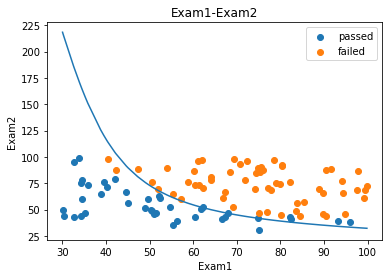

In [55]:
fig4 = plt.figure()
plt.plot(x1_new, X_new_boundary)
passed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, "Exam2"][~mask])  
failed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, "Exam2"][mask])
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2") 
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()